In [1]:
from csv import DictReader

with open('_data/properties_master.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

In [2]:
PROPERTIES = [
    'properties.autoignition_temp.value'
]

samples = []
for row in rows:
    _n_present = 0
    for prop in PROPERTIES:
        if row[prop] != '-':
            _n_present += 1
            continue
        else:
            break
    if _n_present >= len(PROPERTIES):
        samples.append(row)

print(len(samples))

ai_temp = [float(s[PROPERTIES[0]]) for s in samples]
smiles = [s['canonical_smiles'] for s in samples]

79


In [3]:
from ecnet.datasets import QSPRDataset

ds = QSPRDataset(smiles, ai_temp, backend='alvadesc')

In [4]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(ds.desc_vals.detach().numpy(), ai_temp)
feat_imp = list(rfr.feature_importances_)

In [8]:
top_desc = feat_imp.index(max(feat_imp))
top_desc_name = ds.desc_names[top_desc]
top_desc_vals = [sample[top_desc] for sample in ds.desc_vals]

print(top_desc_name)

SssCH2


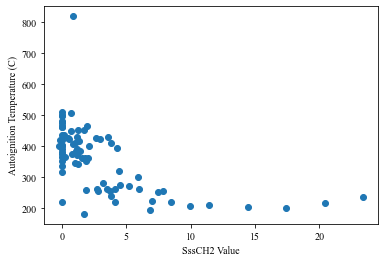

In [9]:
from matplotlib import pyplot as plt

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel(f'{top_desc_name} Value')
plt.ylabel('Autoignition Temperature (C)')
plt.scatter(top_desc_vals, ai_temp)
plt.show()

In [11]:
import numpy as np

np_feat_imp = np.array(feat_imp)

five_most_important_idx = np_feat_imp.argsort()[-5:][::-1]
print(five_most_important_idx)

[2975  868 1266 1312 1276]


In [12]:
for idx in five_most_important_idx:
    print(ds.desc_names[idx])

SssCH2
AVS_B(s)
Eta_epsi_A
SpMaxA_EA(bo)
Eta_L_A
